<h1>Отчет по практикой задаче "Явление захватывания и резонанс второго рода".</h1>
<h3>Дата выполнения 08/09/20.</h3>
<h3>Выполнил Мандров Александр, студент 424 группы.</h3>

<p>В данной работе изучалось явление захватывания, которое основывается на навязывании автоколебательной системе частоты вынуждающего воздействия. Измерялись АЧХ в зависимости от различных падающих амплитуд внешнего источника и его частот. По ним мы получали области синхронизации и делали вывод о том, как те или иные характеристики внешнего источника влияют на систему и возникающие в ней колебания.</p>

<p>В качестве оборудования использовалась автоколебательная система с обратной связью, внешним воздействием служил внешний источник ЭДС.</p>

<p>Принцип работы: варьирую частоту внешнего воздействия $p$ вблизи значения $\omega_0$ собственной частоты колебательной системы, колебания системы синхронизируются по частоте с внешним воздействием. Такой синхронный режим существует лишь в определенной полосе расстроек $|p − \omega_0|$ ,
называемой полосой синхронизации, или областью захватывания, причем полоса синхронизации тем шире, чем больше интенсивность воздействия.</p>

Подключим необходимые библиотеки для удобства работы с массивами и построению графиков. Так же определим функцию norm, которая будет нормировать входной массив на величину, переданную в качестве второго аргумента в эту функцию.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def norm(lst, Umax):
    ans = []
    for elem in lst:
        ans.append(elem / Umax)
    return ans

$$\textbf{Упражнение 1}$$

<p>В этом упражнении необходимо снять три резонансные кривые недовозбужденной системы в зависимости от разных параметров выходного напряжения с источника, здесь и далее $A$ - это удвоенная амплитуда (peak-to-peak) установленная на внешнем источнике, а $М$ - коэффициент обратной связи колебательной системы.</p>

In [3]:
# Результаты измерения и непосредственная обработка результатов.
# Здесь и далее a - амплитуды колебаний, f - частоты, устанавливаемые на внешнем источнике

# M=200 A=200mV
a1 = [90, 100, 140, 220, 500, 350, 160, 100, 80, 60]

# np.arange(start, stop, step) формирует массив в диапазоне от значения 
# start до значения stop исключительно. С шагом step
f1 = np.arange(148, 158, 1)
# отнормируем значения амплитуды колебаний, np.max(arr) вернет максимальное 
# значение в массиве arr, на него и нормируем.
a1_norm = norm(a1, np.max(a1))

# M=200 A=20mV
a2 = [60, 80, 90, 100, 100, 100, 90, 80, 70, 60]
f2 = np.arange(151.8, 152.8, .1)
a2_norm = norm(a2, np.max(a2))

# M=180 A=20mV
a3 = [60, 60, 60, 60, 50]
f3 = np.arange(152.1, 152.6, .1)
a3_norm = norm(a3, np.max(a3))

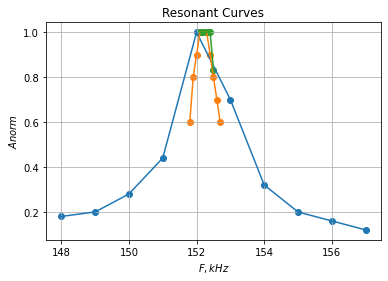

In [4]:
# Построим все три резонансных кривых на одном графике.
# Видим, что чем интенсивнее сигнал с внешнего источника, 
# тем более легче исследовать резонансную область и снимать полосу синхронизации
plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.plot(f1, a1_norm)
plt.scatter(f1, a1_norm)
plt.plot(f2, a2_norm)
plt.scatter(f2, a2_norm)
plt.plot(f3, a3_norm)
plt.scatter(f3, a3_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curves')
plt.show()

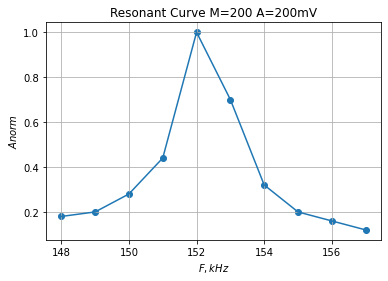

In [18]:
# Для удобства построим все три графика отдельно.
# M=200 A=200mV
plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.plot(f1, a1_norm)
plt.scatter(f1, a1_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curve M=200 A=200mV')
plt.show()

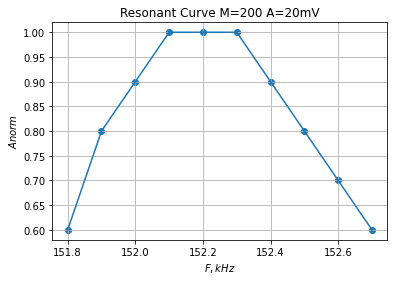

In [17]:
# M=200 A=20mV
plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.plot(f2, a2_norm)
plt.scatter(f2, a2_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curve M=200 A=20mV')
plt.show()

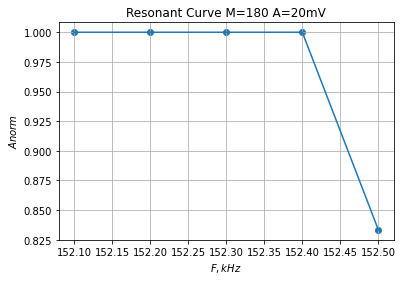

In [19]:
# M=180 A=20mV
# Левая ветвь отсутствует, так как колебания были неразличимы с шумом, 
# А устанавливалось на внешнем источнике, без учета делителя.
# То есть на систему приходил сигнал с амплитудой 1mV.
# Но динамика, в целом, понятна. При уменьшении интенсивности сигнала, получаем менее широкую полосу синхронизации
plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.scatter(f3, a3_norm)
plt.plot(f3, a3_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curve M=180 A=20mV')
plt.show()

$$\textbf{Упражнение 2}$$

<p>Целью данного упражнения было определить коэффициент обратной связи, при которой без внешнего источника в системе возбуждались колебания. А в дальнейшем определить как связана ширина полосы от интенсивности внешнего источника (его амплитуды). Логично было ожидать похожих результатов, как и в случае недовозбужденной системы. Ширина полосы тем шире, чем интенсивнее воздействует на систему внешний источник.</p>

In [10]:
# Mgeneration = 240

# M=Mgen A=20mV f_Res=152.09kHz
# deltaF=(152.1 -- 152.4) kHz catch-width

# M=Mgen A=200mV f_Res=152.09kHz
# deltaF=(150.4 -- 154.2) kHz catch-width

$$\textbf{Упражнение 3}$$

<p>Исследуем зависимость граничных частот захватывания от амплитуды на внешнем источнике (peak-to-peak)</p>

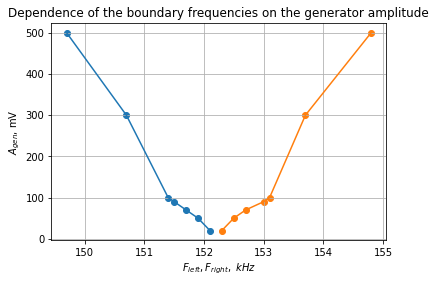

In [16]:
# A_gen = 500mV M=242 F_left = 149.7 kHz F_rigth = 154.8 kHz
# A_gen = 300mV M=242 F_left = 150.7 kHz F_rigth = 153.7 kHz
# A_gen = 100mV M=242 F_left = 151.4 kHz F_rigth = 153.1 kHz
# A_gen = 90mV M=242 F_left = 151.5 kHz F_rigth = 153 kHz
# A_gen = 70mV M=242 F_left = 151.7 kHz F_rigth = 152.7 kHz
# A_gen = 50mV M=242 F_left = 151.9 kHz F_rigth = 152.5 kHz
# A_gen = 20mV M=242 F_left = 152.1 kHz F_rigth = 152.3 kHz

# Теперь когда измерения сняты, подготовим массивы для графиков и построим сам график
# Наблюдаем на графике результат схожий с тем, который представлен в описании, по мере 
# увеличении амплитуды внешнего источника, ширина полосы растет.

A = [500, 300, 100, 90, 70, 50, 20]
F_left = [149.7, 150.7, 151.4, 151.5, 151.7, 151.9, 152.1]
F_right = [154.8, 153.7, 153.1, 153, 152.7, 152.5, 152.3]
plt.ylabel('$A_{gen}$, mV')  
plt.xlabel('$F_{left},F_{right},$ $kHz$')
plt.plot(F_left, A)
plt.scatter(F_left, A)
plt.scatter(F_right, A)
plt.plot(F_right, A)
grid1 = plt.grid(True)
plt.title('Dependence of the boundary frequencies on the generator amplitude')
plt.show()

$$\textbf{Упражения 4}$$

<p>Более детально изучим случай большей и меньшей амплитуды на внешнем источнике. Построим резонансные кривые для них</p>

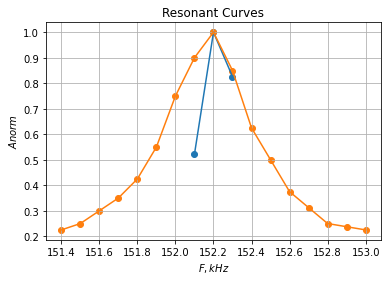

In [20]:
# A_gen = 20mV M=242 F_left = 152.1 kHz F_rigth = 152.3 kHz
a4 = [240, 460, 380]
f4 = np.arange(152.1, 152.3, .1)
a4_norm = norm(a4, np.max(a4))

# A_gen = 100mV M=242 F_left = 151.4 kHz F_rigth = 153.1 kHz
a5 = [180, 200, 240, 280, 340, 440, 600, 720, 800, 680, 500, 400, 300, 250, 200, 190, 180]
f5 = np.arange(151.4, 153.1, .1)
a5_norm = norm(a5, np.max(a5))

plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.scatter(f4, a4_norm)
plt.plot(f4, a4_norm)
plt.scatter(f5, a5_norm)
plt.plot(f5, a5_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curves')
plt.show()

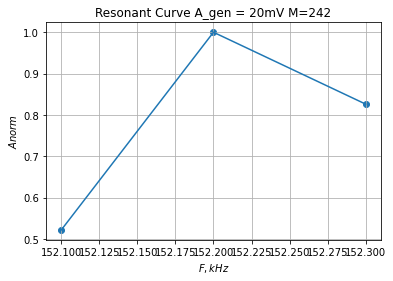

In [22]:
# Построим эти 2 кривые отдельно.

# A_gen = 20mV M=242
# Снова возникла сложность для меньшей амплитуды на внешнем ЭДС, связанная с делителем.
# Но, даже по трем точкам можем оценить тенденцию: резонанс наблюдается, но в более узком диапазоне.
plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.scatter(f4, a4_norm)
plt.plot(f4, a4_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curve A_gen = 20mV M=242')
plt.show()

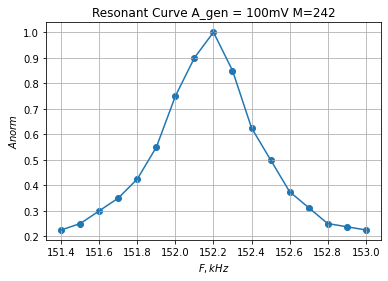

In [23]:
# A_gen = 100mV M=242
plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.scatter(f5, a5_norm)
plt.plot(f5, a5_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curve A_gen = 100mV M=242')
plt.show()

$$\textbf{Упражнение 5}$$

<p>Теперь рассмотрим резонанс второго рода. Это явление связанное с тем, что если настроить внешнюю частоту источника на $2\omega_0$, т.е. $p \approx 2\omega_0$ в
системе при определенных условиях, наряду с вынужденными колебаниями, имеющими частоту $p$ внешней силы, могут возникнуть интенсивные колебания с частотой, точно в два раза ниже частоты внешней силы. В этом случае наступает резонанс второго рода.</p>

<p>Для этого снимем снова АЧХ в случае резонанса второго рода. Так же снимем зависимость амплитуды нормированной колебаний системы от амплитуды на внешнем источнике(график будет чуть ниже)</p>

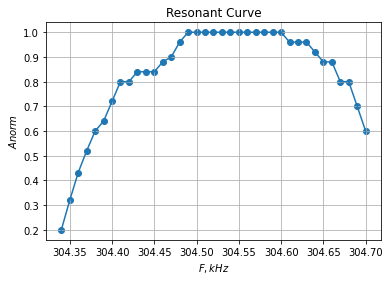

In [100]:
# A_gen(Vpp) = 1V M=200 p_left = 304.34 kHz p_right = 304.7 kHz p_center = 304.52
a6 = [500, 800, 1080, 1300, 1500, 1600, 1800, 2000, 2000, 2100, 
      2100, 2100, 2200, 2250, 2400, 2500, 2500, 2500, 2500, 2500,
      2500, 2500, 2500, 2500, 2500, 2500, 2500, 2400, 2400, 2400, 2300, 2200, 2200, 2000, 2000, 1750, 1500]
p6 = np.arange(304.34, 304.7, .01)
a6_norm = norm(a6, np.max(a6))

a7 = [1200, 1800, 2000, 2400, 2500, 2600, 3000, 3000, 3000, 3000, 3000, 3000, 2000]
a_gen7 = [600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 4600, 8000]
a7_norm = norm(a7, np.max(a7))

plt.ylabel('$Anorm$')  
plt.xlabel('$F, kHz$')
plt.scatter(p6, a6_norm)
plt.plot(p6, a6_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curve')
plt.show()

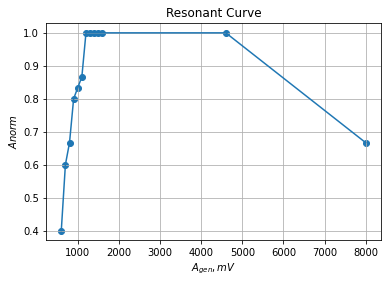

In [101]:
plt.ylabel('$Anorm$')  
plt.xlabel('$A_{gen}, mV$')
plt.scatter(a_gen7, a7_norm)
plt.plot(a_gen7, a7_norm)
grid1 = plt.grid(True)
plt.title('Resonant Curve')
plt.show()